In [56]:
import numpy as np
import tensorflow as tf

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [58]:
vocab_size = 10000
embed_dim = 16
max_len = 100
trunc = 'post'
padd = 'post'
oov_tok = "<OOV>"
train_size = 20001

In [59]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('./Sarcasm_Headlines_Dataset.json'))

In [60]:
sentences = []
labels = []

for items in data:
    sentences.append(items['headline'])
    labels.append(items['is_sarcastic'])

In [61]:
train_sentences = sentences[0:train_size]
test_sentences = sentences[train_size:]
train_labels = labels[0:train_size]
test_labels = labels[train_size:]

In [62]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_sentences)
train_pad = pad_sequences(train_seq,maxlen=max_len,padding=padd,truncating=trunc)

test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq,maxlen=max_len,padding=padd,truncating=trunc)

In [63]:
train_pad = np.array(train_pad)
test_labels = np.array(test_labels)
test_pad = np.array(test_pad)
test_labels = np.array(test_labels)

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [66]:
num_epochs = 35
history = model.fit(train_pad, train_labels, epochs=num_epochs, validation_data=(test_pad, test_labels), verbose=2)

Train on 20001 samples, validate on 6708 samples
Epoch 1/35
 - 4s - loss: 0.6650 - acc: 0.6012 - val_loss: 0.5764 - val_acc: 0.7211
Epoch 2/35
 - 3s - loss: 0.4318 - acc: 0.8287 - val_loss: 0.3899 - val_acc: 0.8281
Epoch 3/35
 - 2s - loss: 0.3148 - acc: 0.8737 - val_loss: 0.3553 - val_acc: 0.8497
Epoch 4/35
 - 2s - loss: 0.2638 - acc: 0.8968 - val_loss: 0.3435 - val_acc: 0.8558
Epoch 5/35
 - 2s - loss: 0.2281 - acc: 0.9128 - val_loss: 0.3435 - val_acc: 0.8558
Epoch 6/35
 - 2s - loss: 0.2016 - acc: 0.9242 - val_loss: 0.3472 - val_acc: 0.8539
Epoch 7/35
 - 2s - loss: 0.1786 - acc: 0.9331 - val_loss: 0.4058 - val_acc: 0.8299
Epoch 8/35
 - 2s - loss: 0.1632 - acc: 0.9399 - val_loss: 0.3677 - val_acc: 0.8539
Epoch 9/35
 - 2s - loss: 0.1454 - acc: 0.9477 - val_loss: 0.3843 - val_acc: 0.8530
Epoch 10/35
 - 2s - loss: 0.1345 - acc: 0.9526 - val_loss: 0.4004 - val_acc: 0.8533
Epoch 11/35
 - 2s - loss: 0.1223 - acc: 0.9583 - val_loss: 0.4366 - val_acc: 0.8408
Epoch 12/35
 - 2s - loss: 0.1124 - a

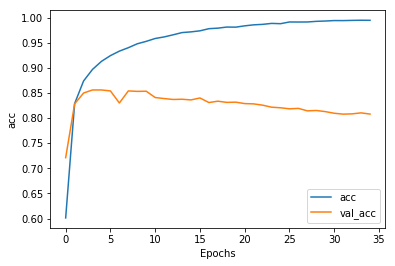

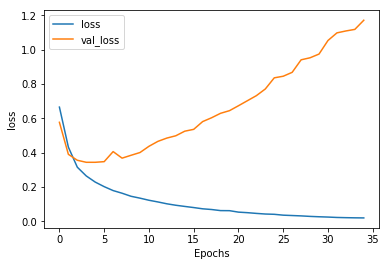

In [67]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [68]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(train_pad[0]))
print(train_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [69]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [71]:
sentence = ["granny starting to fear spiders in the garden might be real",
            "game of thrones season finale showing this sunday night",
           "it is looking like it might be the end of the world eh?",
           "local barber arrested over homicide accuse",
           "i love you, dont i?",
           "i love eating toasted cheese and tuna sandwiches",
           "the government has shown the ability to do anything for the public and how much they care about them by opening up the beaches in Florida"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding=padd, truncating=trunc)
print(model.predict(padded))

[[9.9535286e-01]
 [4.0233917e-05]
 [1.0463504e-04]
 [9.6833289e-01]
 [8.9706973e-06]
 [1.4693607e-02]
 [2.5236510e-08]]
